In [1]:
import numpy as np


In [8]:
# network size N
N = 5000
## start out with no infectious individuals
X = np.zeros(N, dtype = int)

## generate random edge matrix with fixed number (30 x N) edges
E = np.random.randint(0,N,size=2*N*30).reshape((N*30, 2))

# number of edges
M = np.shape(E)[0]

## infection rate
b = 1/62

## initialize time
T = 0

## choose Tmax
Tmax = 1000

## initial condition
infected_fraction = 0.1
X[np.random.randint(0, N, size=int(0.1*N))] = 1

## initialize number infected
I = np.sum(X)

## find the number of events that occur in the interval from T = 0 to T = Tmax
n = np.random.poisson(lam = Tmax*(N+b*M))

## find times for all events
times = np.sort(np.random.uniform(0, Tmax, n))

## initialize list of infected people for all timesteps
infected = np.zeros(n)


In [9]:
for t in range(n):

    if np.random.random() < N/(N + b*M):

        i = np.random.randint(N)

        I -= X[i]

        X[i] = 0

    else:

        i,j = E[np.random.randint(M)]

        I += X[i] ^ X[j]

        X[i] = X[j] = (X[i] or X[j])
    
    infected[t] = I

    if I == 0:
        print(f"the simulation has ended after {t} iterations")
        break


the simulation has ended after 1624506 iterations


[8.00839166e-05 1.43794570e-04 1.55825856e-04 ... 9.99999557e+02
 9.99999977e+02 9.99999996e+02]


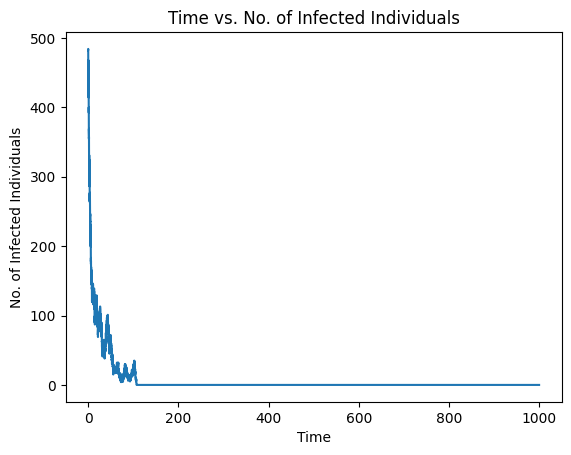

In [7]:
import matplotlib.pyplot as plt
print(times)
plt.plot(times, infected)
plt.title('Time vs. No. of Infected Individuals')
plt.ylabel('No. of Infected Individuals')
plt.xlabel('Time')
plt.show()
